# Figure - Data on violation with Sound rule


Current status:

- pulled processed data from the assess_dms_gnp_data.ipynb in dj_expoloratory_notebooks
- if I want to determine sa vs sb rule, will need to do some digging for each animal in stage 11 what they are doing
  - what is the delay (pre, delay, post)
  - what is the give? (give_type_imp) remove any guided sessions
  - what is the sound rule? Sa vs sb vs full
  - it is worth getting additional stages? e.g. R013 doing the full task
    - probably not- this isn't the point, but would be good to see if sa vs sb rule animals differ

This [table](https://docs.google.com/spreadsheets/d/1uGauAJ3PJTlj_0XlLNt4W4WnciQ-QbvexeeFBhaK2ds/edit?usp=sharing) will help with figuring out the sa/sb animals


In [54]:
import seaborn as sns
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

DATA_PATH = "/Users/jessbreda/Desktop/github/jbreda_animal_training/data/analyses/fixation_experiment"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load


In [55]:
tdf = pd.read_csv(DATA_PATH + "processed_df.csv", low_memory=False)

Stage 11 is when animals are using the sound rule- usually a simple rule but will need to do analysis to determine given sa and sb sound pairs


In [56]:
tdf.query("stage ==11").groupby('animal_id')['give_type_imp'].unique()

animal_id
C215                     [none]
C220              [none, water]
C221                     [none]
C222                     [none]
C223                     [none]
R010                     [none]
R011                     [none]
R012                     [none]
R013                     [none]
R014                     [none]
R015                     [none]
R020                     [none]
R021    [water_and_light, none]
R022                     [none]
R023                     [none]
R024                     [none]
R025                     [none]
R026                     [none]
R027                     [none]
R029                     [none]
R030              [light, none]
R031                     [none]
R032                     [none]
R033                     [none]
R034                     [none]
R035                     [none]
R036                     [none]
R037                     [none]
R039                     [none]
Name: give_type_imp, dtype: object

In [57]:
tdf.query("stage ==11").groupby('animal_id')['sound_pair'].unique()

animal_id
C215                           [3.0, 3.0, 3.0, 12.0]
C220    [3.0, 12.0, 12.0, 12.0, 3.0, 3.0, 12.0, 3.0]
C221                           [3.0, 3.0, 3.0, 12.0]
C222                           [3.0, 3.0, 3.0, 12.0]
C223                           [3.0, 3.0, 3.0, 12.0]
R010                           [3.0, 12.0, 3.0, 3.0]
R011                           [3.0, 3.0, 12.0, 3.0]
R012                           [3.0, 3.0, 3.0, 12.0]
R013                           [3.0, 12.0, 3.0, 3.0]
R014                           [3.0, 3.0, 12.0, 3.0]
R015    [12.0, 12.0, 3.0, 12.0, 12.0, 3.0, 3.0, 3.0]
R020                         [12.0, 3.0, 12.0, 12.0]
R021                           [3.0, 12.0, 3.0, 3.0]
R022                           [3.0, 3.0, 3.0, 12.0]
R023                           [3.0, 12.0, 3.0, 3.0]
R024                         [12.0, 12.0, 12.0, 3.0]
R025                         [12.0, 3.0, 12.0, 12.0]
R026                         [12.0, 3.0, 12.0, 12.0]
R027                           [3.0,

# Plot


In [58]:
viol_by_session = (
    tdf.query("stage ==11 and animal_id != 'C214'")
    .groupby(["animal_id", "sess_id"])
    .violations.mean()
).reset_index()

In [59]:
stats = viol_by_session['violations'].agg(['median', 'mean', 'std', 'size']).reset_index()
stats

,index,violations
0,median,0.086614
1,mean,0.118718
2,std,0.113792
3,size,583.000000


In [60]:
viol_by_session.animal_id.nunique()

29

(0.0, 1.0)

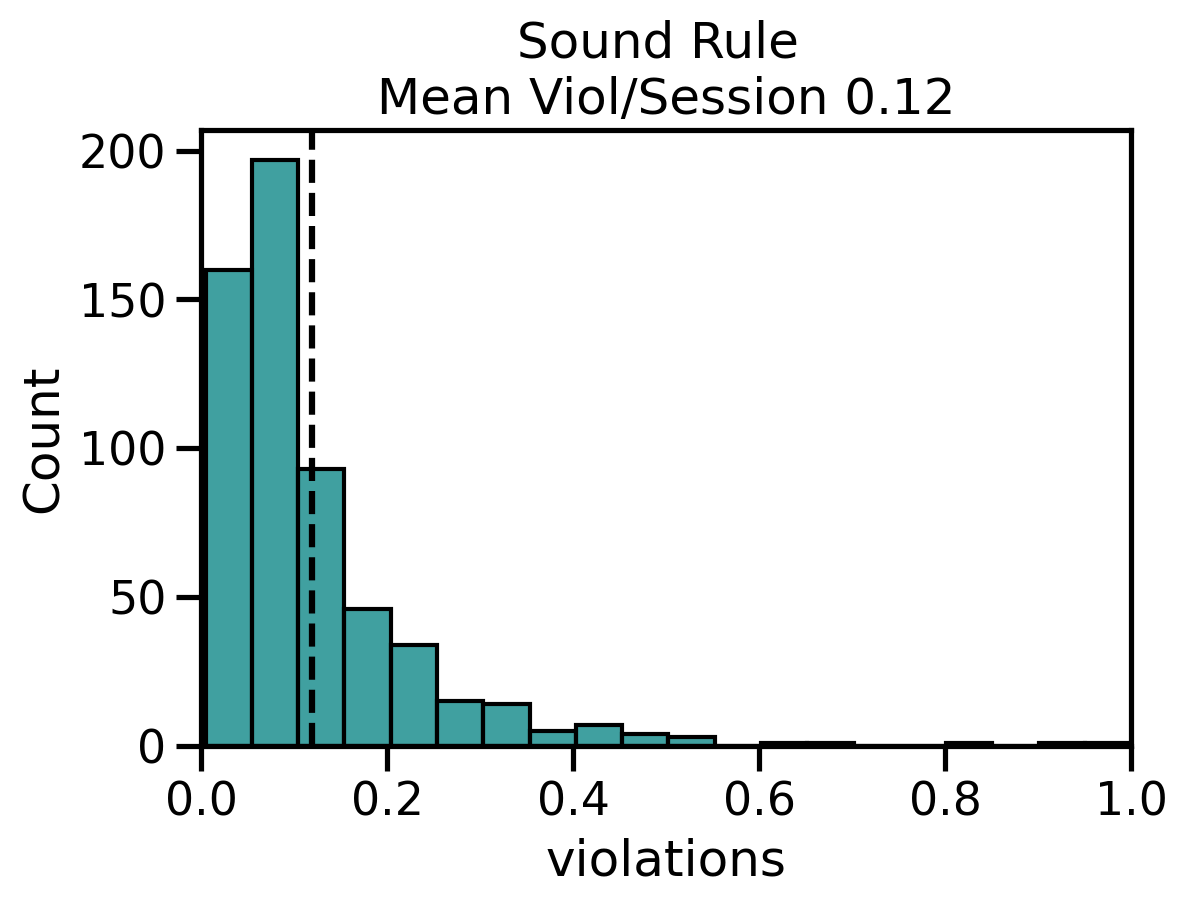

In [61]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=200)



sns.histplot(
    data=viol_by_session, x="violations", bins=20, binwidth=0.05, color="teal", ax=ax
)


mean = viol_by_session.violations.mean()
ax.axvline(mean, color="k", linestyle="--")
plt.title(f"Sound Rule \nMean Viol/Session {mean:.2f}")
plt.xlim(0, 1)

(-0.05, 0.5)

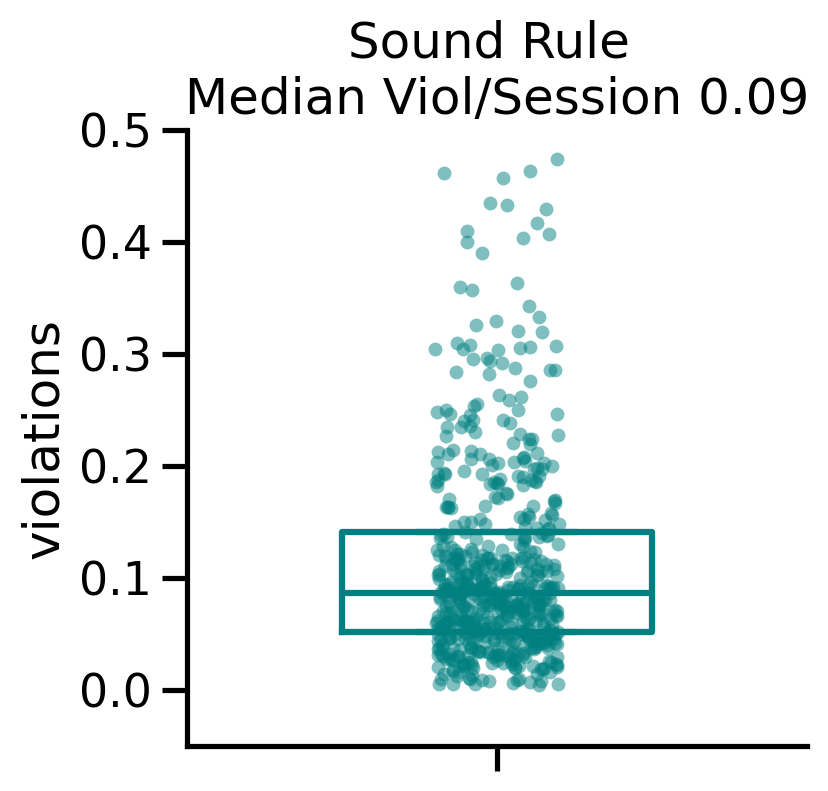

In [62]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
sns.despine(ax=ax)
sns.boxplot(
    data=viol_by_session, y="violations", color="teal", ax=ax, 
    showfliers=False, width=0.5, fill=False, whis=0,
)

sns.stripplot(
    data=viol_by_session, y="violations", color="teal", ax=ax, alpha=0.5, s=5,
)

median = viol_by_session.violations.median()
plt.title(f"Sound Rule \nMedian Viol/Session {median:.2f}")
plt.ylim(-0.05, 0.5)

In [65]:
hit_by_session = (
    tdf.query("stage ==11 and animal_id != 'C214'")
    .groupby(["animal_id", "sess_id"])
    .hits.mean()
).reset_index()

In [67]:
stats = hit_by_session['hits'].agg(['median', 'mean', 'std', 'size']).reset_index()
stats

,index,hits
0,median,0.841983
1,mean,0.807696
2,std,0.118901
3,size,583.000000
